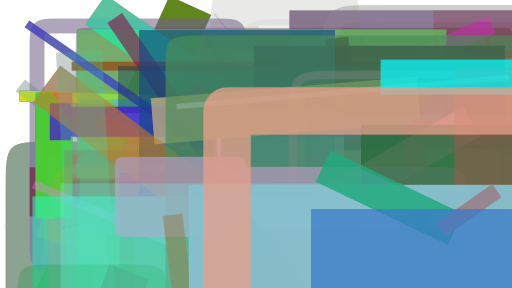

In [4]:
import cairo
import numpy
import random

# A simple function to display an image in an ipython notebook
def displayIPythonNoteBook( byteArray ):
    from IPython.display import display, Image
    from PIL.Image import fromarray
    from StringIO import StringIO
 
    ioObject = StringIO()
    fromarray( byteArray ).save( ioObject, 'png' )
    display( Image( ioObject.getvalue() ) )
 
# hhghghg
def roundedRectangle( context ):
    x = random.randint(0,500)
    y = random.randint(0,500)
    w = random.randint(0,500)
    h = random.randint(0,500) 
    r = random.randint(0,50) 
    context.move_to(x+r,y)                      # Move to A
    context.line_to(x+w-r,y)                    # Straight line to B
    context.curve_to(x+w,y,x+w,y,x+w,y+r)       # Curve to C, Control points are both at Q
    context.line_to(x+w,y+h-r)                  # Move to D
    context.curve_to(x+w,y+h,x+w,y+h,x+w-r,y+h) # Curve to E
    context.line_to(x+r,y+h)                    # Line to F
    context.curve_to(x,y+h,x,y+h,x,y+h-r)       # Curve to G
    context.line_to(x,y+r)                      # Line to H
    context.curve_to(x,y,x,y,x+r,y)             # Curve to A
    return

def line( context ):
    context.set_source_rgba( random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), random.uniform(0.0, 1.0) )
    context.set_line_width( random.uniform(0.0, 50.0) )
    context.move_to( random.uniform(0.0, 500.0), random.uniform(0.0, 500.0) )
    context.line_to( random.uniform(0.0, 500.0), random.uniform(0.0, 500.0) )
    context.stroke()
    return

def rectangle( context ):
    gradient = cairo.LinearGradient (random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), random.uniform(0.0, 1.0))
    gradient.add_color_stop_rgba (random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), random.uniform(0.0, 1.0)) 
    gradient.add_color_stop_rgba (random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), random.uniform(0.0, 1.0)) 
    context.rectangle (random.randint(0,500), random.randint(0,500), random.randint(0,500), random.randint(0,500)) 
    context.set_source (gradient)
    context.fill ()
    context.translate (0.1, 0.1) 
    return


WIDTH = 512
HEIGHT = 288
# byte array
byteArray = numpy.zeros( (HEIGHT,WIDTH,4), dtype=numpy.uint8 )
# this creates a cairo context based on the numpy buffer
imageSurface = cairo.ImageSurface.create_for_data( byteArray, cairo.FORMAT_ARGB32, WIDTH, HEIGHT )
context = cairo.Context( imageSurface )
 
for num in range(0,300):
    randomNumber = random.randint(0,2)
    switcher = {
        0: rectangle,
        1: line,
        2: roundedRectangle,
    }
    # Get the function from switcher dictionary
    func = switcher.get(randomNumber)
    # Execute the function
    func( context )
    
# display the image
displayIPythonNoteBook( byteArray )